In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
pd.set_option("display.max_columns", 76)

In [9]:
df_microdados = pd.read_csv('MICRODADOS_ENEM_2023.csv', chunksize=100000, sep=';', encoding='ISO-8859-1').get_chunk()
data = df_microdados

In [10]:
# função para converter os valores da quinta pergunta do questionário (Renda Familiar do candidato) em valores númericos
def convertToNumber(letter):
    letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
    return letters.index(letter) + 1

In [11]:
# Convertendo os valores da quinta pergunta do questionário em valores númericos
data['Q006'] = data['Q006'].map(convertToNumber)

Como podemos ver, em 2023, houveram muito mais candidatas mulheres do que candidatos homens

<Axes: xlabel='TP_SEXO'>

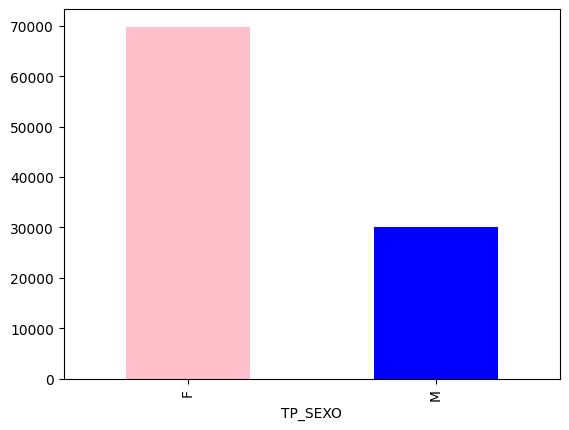

In [12]:
data['TP_SEXO'].value_counts().plot.bar(color=['pink','blue'])

In [13]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

data['TP_COR_RACA'] = data['TP_COR_RACA'].map(converterCor)

<Axes: xlabel='TP_COR_RACA'>

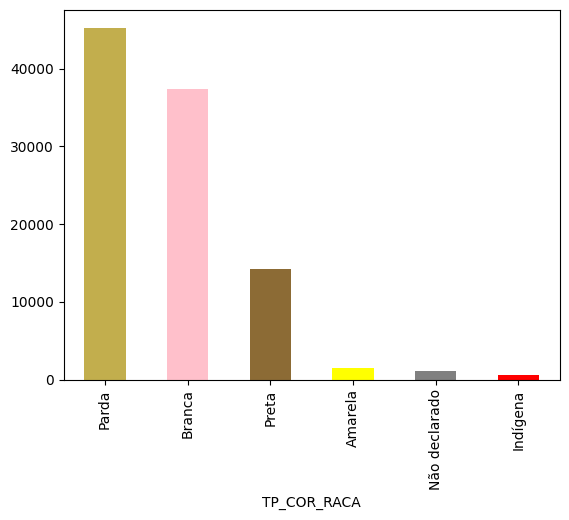

In [14]:
data['TP_COR_RACA'].value_counts().plot.bar(color=['#C2AE4D', 'pink','#8C6B35', 'yellow', 'grey', 'red'])

# Fazendo a Análise Descritiva das notas

In [15]:
# Criando uma lista com as colunas correspondendo às notas dos alunos
notas = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [16]:
data[notas].describe()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
count,78202.000000,78202.000000,75271.000000,75271.000000,78202.000000
mean,527.483147,520.485353,493.615960,527.211609,650.707143
std,85.742432,73.337525,85.634528,128.082278,208.617664
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,473.500000,474.800000,438.900000,427.650000,540.000000
50%,532.800000,523.900000,488.900000,512.900000,660.000000
75%,586.500000,570.400000,546.200000,618.200000,820.000000
max,823.000000,758.600000,868.400000,958.600000,1000.000000


In [17]:
data[notas].median()

NU_NOTA_CH         532.8
NU_NOTA_LC         523.9
NU_NOTA_CN         488.9
NU_NOTA_MT         512.9
NU_NOTA_REDACAO    660.0
dtype: float64

## Boxplot e outliers

<Axes: >

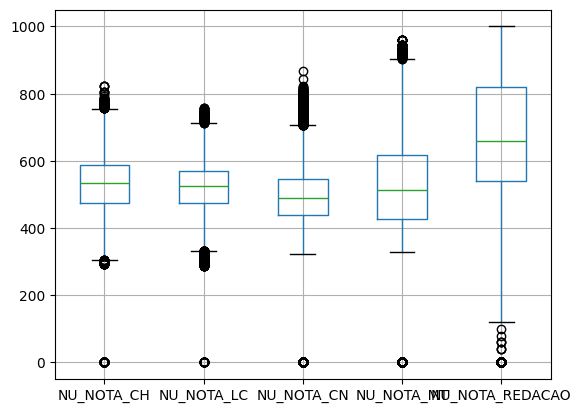

In [18]:
data[notas].boxplot()

## Comparando as distribuições de nota ENEM divididas por disciplina

Como podemos ver, todas as distribuições de notas das disciplinas de Linguagens e Ciências Humanas são relativamente Simétricas.

Por outro lado, as disitribuições de notas das disciplinas de Matemática e Ciencias da Natureza (Principalmente Matemática) são assimétricas com cauda para a direita.

<Axes: >

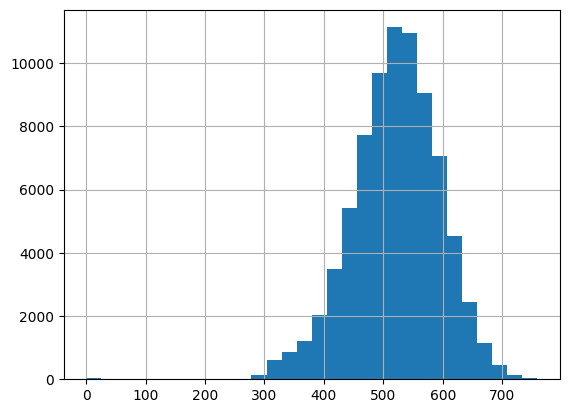

In [19]:
data['NU_NOTA_LC'].hist(bins=30)

<Axes: >

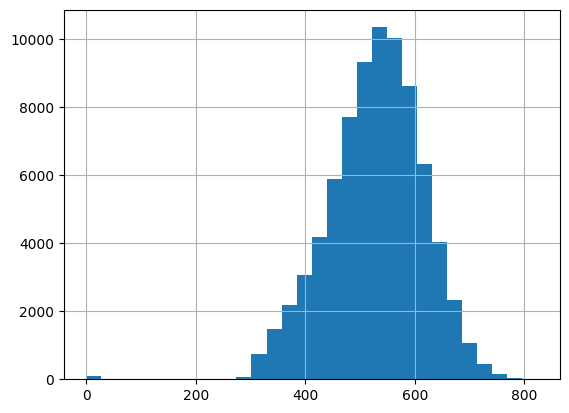

In [20]:
data['NU_NOTA_CH'].hist(bins=30)

<Axes: >

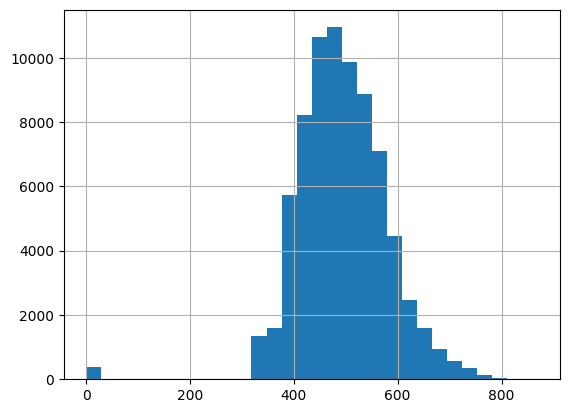

In [21]:
data['NU_NOTA_CN'].hist(bins=30)

<Axes: >

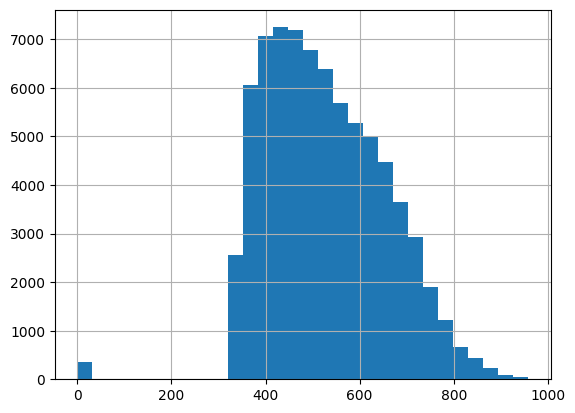

In [22]:
data['NU_NOTA_MT'].hist(bins=30)